In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [147]:
df = pd.read_csv('data/Data P3 MeriSKILL.zip', compression='zip')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [148]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [149]:
for column in df.columns:
    dup = df[column].duplicated().sum()
    print(f"{column} : {dup}")

Age : 1427
Attrition : 1468
BusinessTravel : 1467
DailyRate : 584
Department : 1467
DistanceFromHome : 1441
Education : 1465
EducationField : 1464
EmployeeCount : 1469
EmployeeNumber : 0
EnvironmentSatisfaction : 1466
Gender : 1468
HourlyRate : 1399
JobInvolvement : 1466
JobLevel : 1465
JobRole : 1461
JobSatisfaction : 1466
MaritalStatus : 1467
MonthlyIncome : 121
MonthlyRate : 43
NumCompaniesWorked : 1460
Over18 : 1469
OverTime : 1468
PercentSalaryHike : 1455
PerformanceRating : 1468
RelationshipSatisfaction : 1466
StandardHours : 1469
StockOptionLevel : 1466
TotalWorkingYears : 1430
TrainingTimesLastYear : 1463
WorkLifeBalance : 1466
YearsAtCompany : 1433
YearsInCurrentRole : 1451
YearsSinceLastPromotion : 1454
YearsWithCurrManager : 1452


In [150]:
df.drop_duplicates(inplace=True)

In [151]:
for column in df.columns:
    na = df[column].isna().sum()
    print(f"{column} : {na}")

Age : 0
Attrition : 0
BusinessTravel : 0
DailyRate : 0
Department : 0
DistanceFromHome : 0
Education : 0
EducationField : 0
EmployeeCount : 0
EmployeeNumber : 0
EnvironmentSatisfaction : 0
Gender : 0
HourlyRate : 0
JobInvolvement : 0
JobLevel : 0
JobRole : 0
JobSatisfaction : 0
MaritalStatus : 0
MonthlyIncome : 0
MonthlyRate : 0
NumCompaniesWorked : 0
Over18 : 0
OverTime : 0
PercentSalaryHike : 0
PerformanceRating : 0
RelationshipSatisfaction : 0
StandardHours : 0
StockOptionLevel : 0
TotalWorkingYears : 0
TrainingTimesLastYear : 0
WorkLifeBalance : 0
YearsAtCompany : 0
YearsInCurrentRole : 0
YearsSinceLastPromotion : 0
YearsWithCurrManager : 0


In [152]:
df = df.drop_duplicates()

In [153]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Frequently' : 1, 'Travel_Rarely' : 0})
df['Gender'] = df['Gender'].map({'Female' : 1, 'Male': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.0,1102,Sales,1,2,Life Sciences,1,1,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,Research & Development,8,1,Life Sciences,1,2,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0.0,1373,Research & Development,2,2,Other,1,4,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,Research & Development,3,4,Life Sciences,1,5,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0.0,591,Research & Development,2,1,Medical,1,7,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1320 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [155]:
df.dropna(inplace=True)
df['BusinessTravel'].astype(int)
df['Gender'].astype(int)

0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1320, dtype: int32

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1320 non-null   int64  
 1   Attrition                 1320 non-null   int64  
 2   BusinessTravel            1320 non-null   float64
 3   DailyRate                 1320 non-null   int64  
 4   Department                1320 non-null   object 
 5   DistanceFromHome          1320 non-null   int64  
 6   Education                 1320 non-null   int64  
 7   EducationField            1320 non-null   object 
 8   EmployeeCount             1320 non-null   int64  
 9   EmployeeNumber            1320 non-null   int64  
 10  EnvironmentSatisfaction   1320 non-null   int64  
 11  Gender                    1320 non-null   int64  
 12  HourlyRate                1320 non-null   int64  
 13  JobInvolvement            1320 non-null   int64  
 14  JobLevel     

Plot a correlation map for all numeric variables

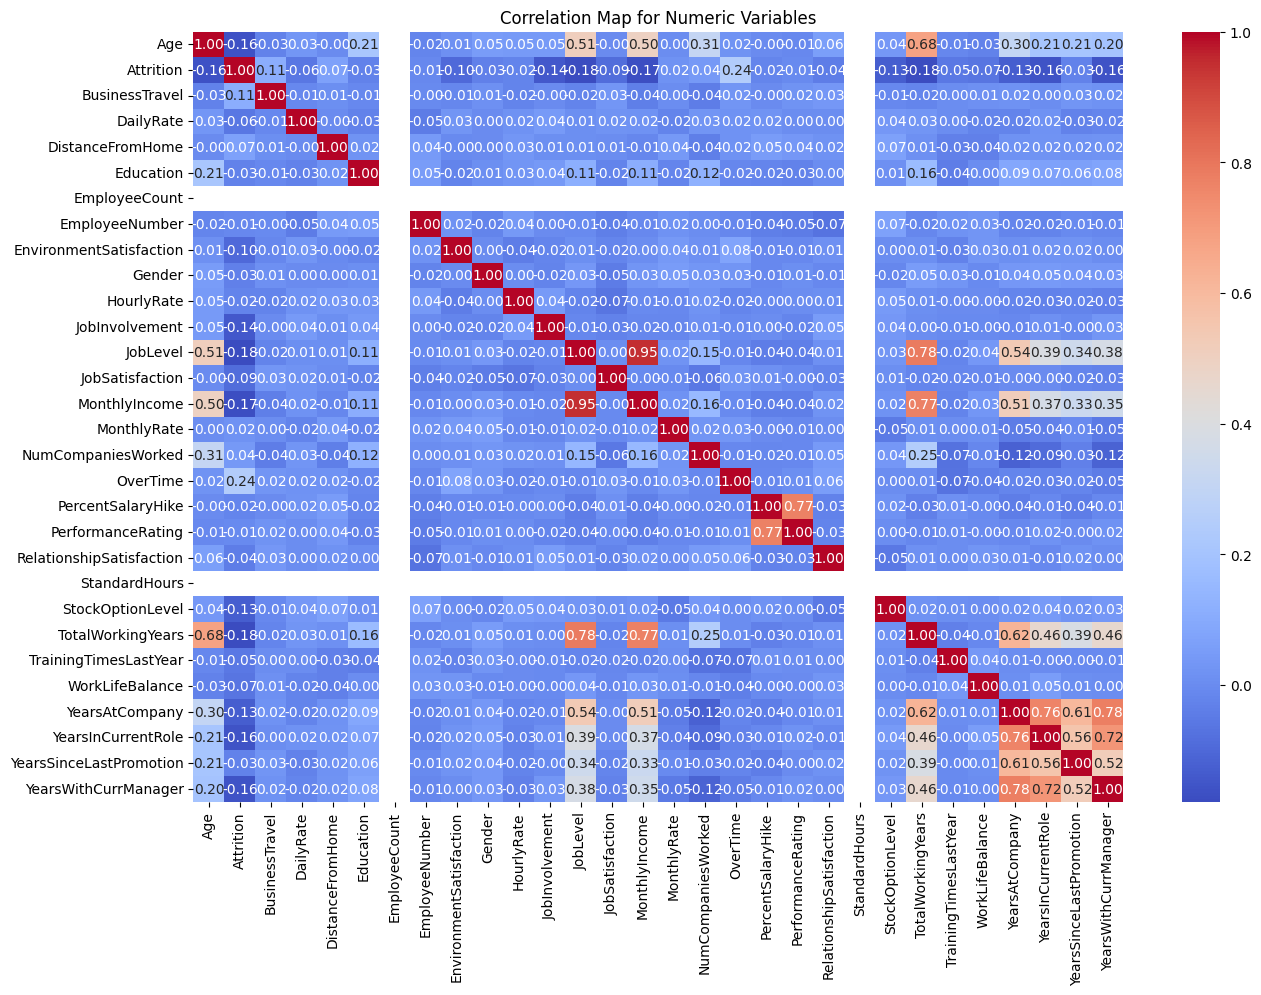

In [157]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns


numeric_df = df[numeric_columns]


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for Numeric Variables')
plt.show()

Overtime

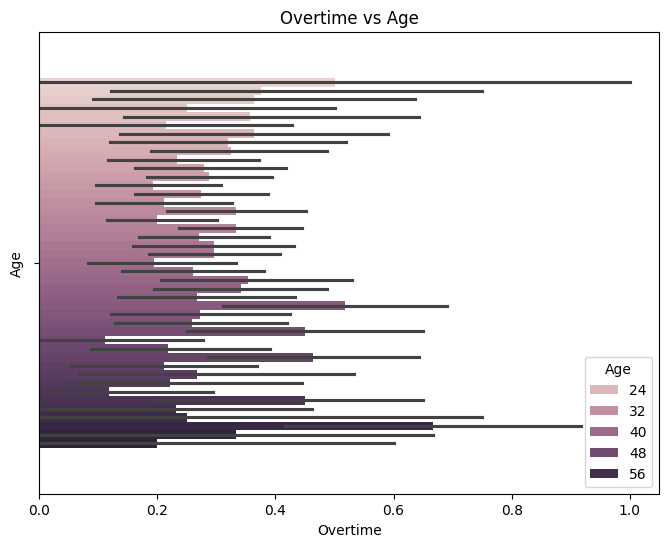

In [167]:
plt.figure(figsize=(8, 6))
sns.barplot(x='OverTime', hue='Age', data=df)
plt.title('Overtime vs Age')
plt.xlabel('Overtime')
plt.ylabel('Age')
plt.show()

Marital Status vs Overtime


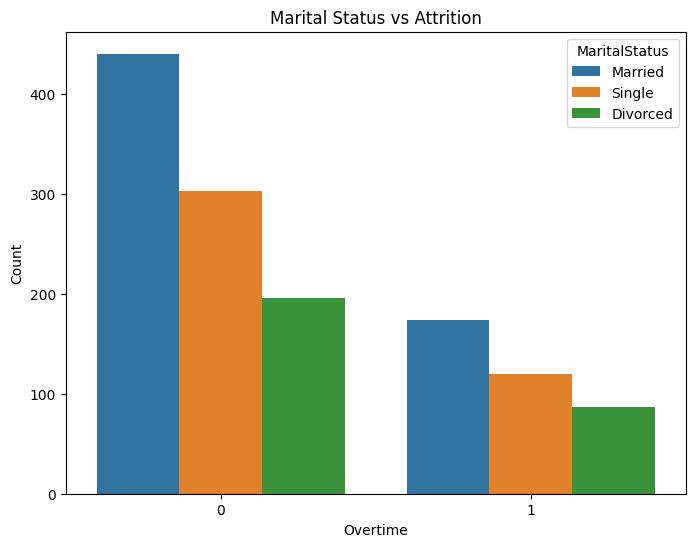

In [171]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='MaritalStatus', data=df)
plt.title('Marital Status vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

Job Role

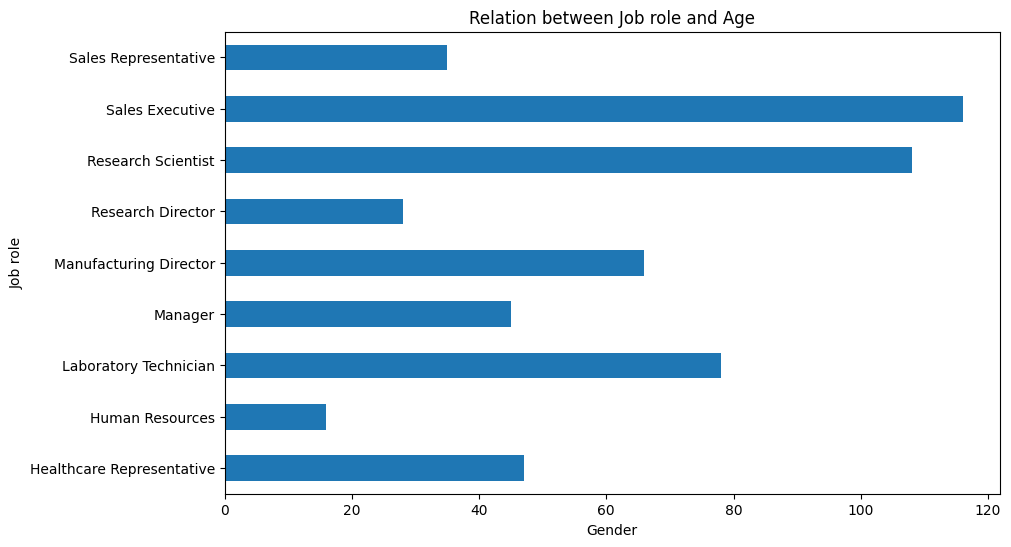

In [185]:
plt.figure(figsize=(10, 6))
df.groupby('JobRole')['Gender'].sum().plot(kind = 'barh')
plt.title('Relation between Job role and Age')
plt.ylabel('Job role')
plt.xlabel('Gender')
plt.show()

Total Working Years

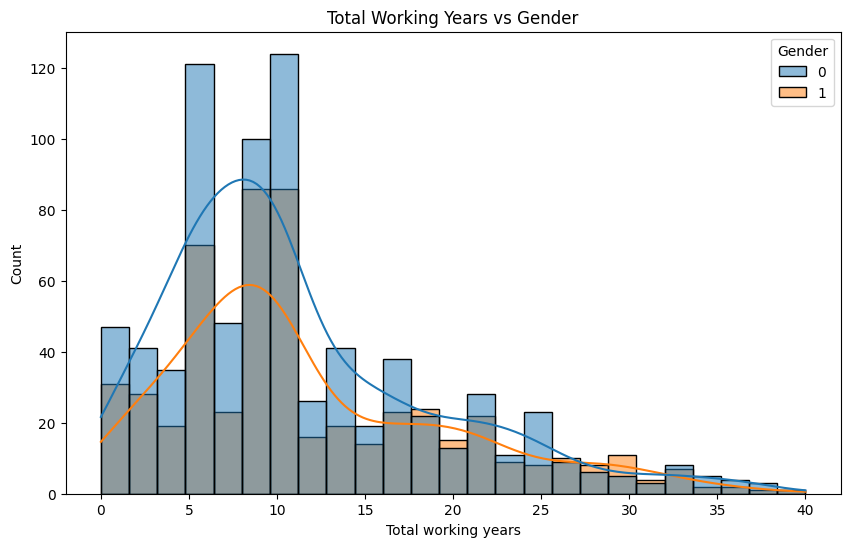

In [192]:
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalWorkingYears', hue='Gender', data=df, kde=True)
plt.title('Total Working Years vs Gender')
plt.xlabel('Total working years')
plt.show()

Education Level

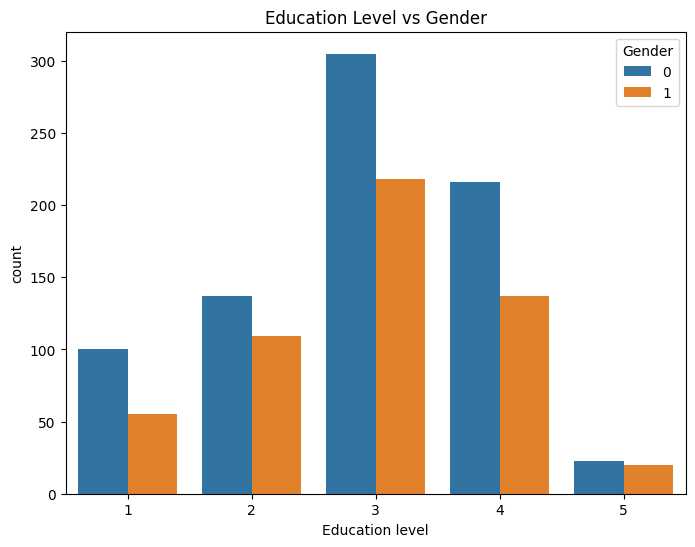

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Gender', data=df)
plt.title('Education Level vs Gender')
plt.xlabel('Education level')
plt.show()

Number of Companies Worked

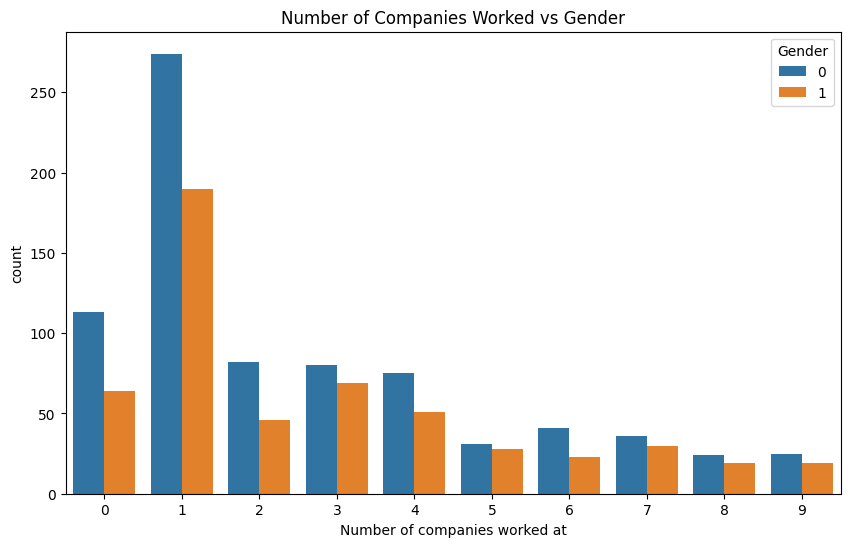

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCompaniesWorked', hue='Gender', data=df)
plt.title('Number of Companies Worked vs Gender')
plt.xlabel('Number of companies worked at')
plt.show()

Distance from Home

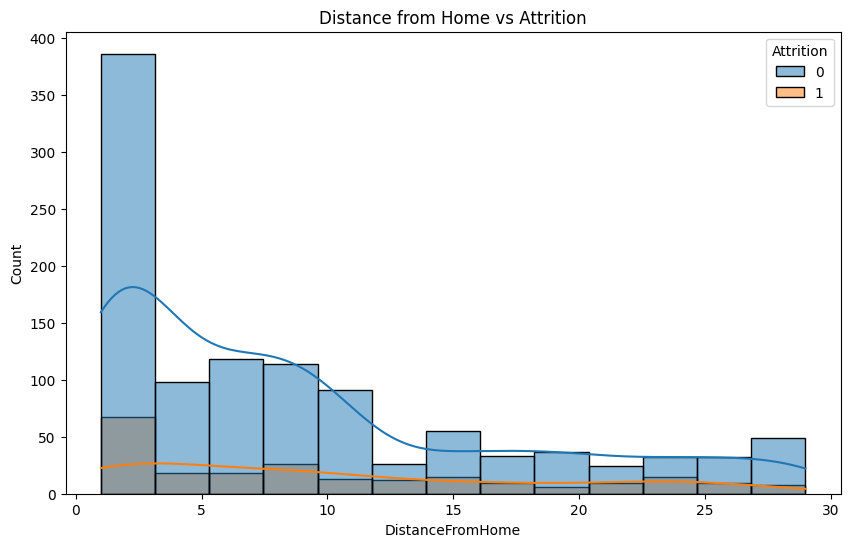

In [196]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['DistanceFromHome'], hue='Attrition', data=df, kde=True)
plt.title('Distance from Home vs Attrition')
plt.show()

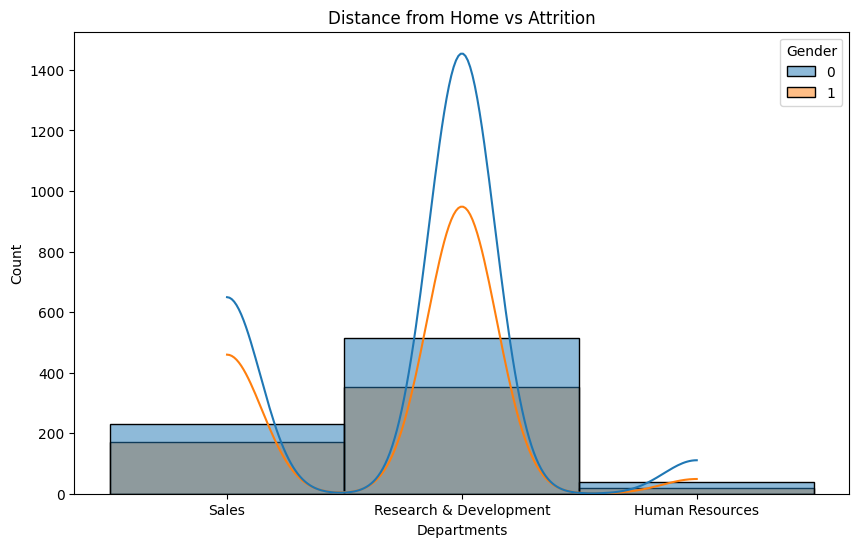

In [197]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Department'], hue='Gender', data=df, kde=True)
plt.title('Distance from Home vs Attrition')
plt.xlabel('Departments')
plt.show()